# TUGAS AKHIR SEMESTER KECERDASAN BUATAN

Nama : Arif Tumpal Leonardo Sianturi

NIM : 09011281823059

Kelas : SK Palembang 2018

Mata Kuliah ; Kecerdasan Buatan

Pada Platfom Jupyter Notebook kali ini, saya akan menentukan akurasi sebuah data menggunakan pendekatan naive bayes. 
Yang dimana data tersebut sebelumnya sudah diklasifikasikan dan diberi label.


Pertama, kita mengimport library apa saja yang kita perlukan

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk

In [2]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Karena pada df yang ditampilkan, ada kolom yang isinya NaN (kosong) seperti Unnamed:2, Unnamed: 3 and Unnamed:4, kita akan menghapusnya saja
Kemudian juga kita akan melakukan rename pada bagian v1 dan v2

In [3]:
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})

In [4]:
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Check pannjang SMS
print (len(df_sms))

5572


In [6]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


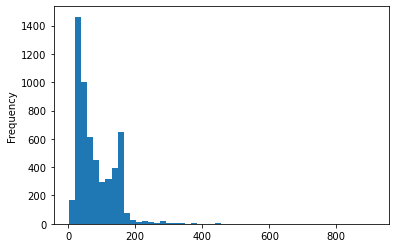

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df_sms['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E595C0FD90>,
      dtype=object)

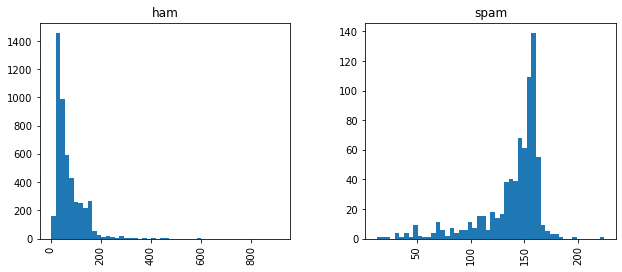

In [11]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [12]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Bag of Words Approach**

Di sini, kita mempunyai kumpulan besar data teks (sebanyak 5.572 baris data).
Dimana sebagian besar algoritma Machine Learning mengandalkan data numerik untuk dimasukkan ke dalamnya sebagai input.
namun, input kali ini berisi pesan email / sms yang biasanya berupa teks. Oleh karena itu, kita membutuhkan cara untuk merepresentasikan data teks untuk algoritma Machine Learning dengan model bag-of-words 
Ini adalah cara mengekstrak fitur dari teks untuk digunakan dalam algoritma di Machine Learning. Dalam pendekatan ini, kami menggunakan kata yang terlebih dahulu diberi token dan mencari tahu frekuensi setiap token. Dengan menggunakan proses yang akan kita lalui sekarang, kita dapat mengonversi kumpulan dokumen menjadi matriks, dengan setiap dokumen menjadi baris dan setiap kata (token) menjadi kolom, dan nilai (baris, kolom) yang sesuai menjadi frekuensi kemunculan setiap kata atau token dalam dokumen itu.

Untuk contoh, kita menggunakan 4 kata ini :

**['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']**

Dimana tujuan kita ialah untuk mengkonversi suatu set data text kedalam matrix distribusi frekuensi seperti dibawah ini :
<img src="https://image.ibb.co/casG7U/countvectorizer.png" alt="table">

Disini, dapat kita lihat bahwa, data tersebut berubah menjadi angka dalam kolom dan baris, serta angka merepresentasikan frekuensi kemunculan mereka didalam data tersebut

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

1.  It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

Kita akan menggunakan method sklearn count vektorizer dimana method tersebut yang melakukan hal berikut:

1. Men-tokenisasi string (memisahkan string menjadi kata-kata individu) dan memberikan ID integer untuk setiap token.
2. Menghitung kemunculan masing-masing token tersebut.

**Implementasi dari Bag of Words Approach**

Step 1: Convert semua tipedata string ke lower case.

In [13]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


Step 2: Menghilangkan tanda baca

In [14]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

Step 3: Tokenization

In [15]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

Step 4: Menghitung frekuensi

In [16]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


**Mengimplementasikan Bag of Words di scikit-learn**

Di sini kita akan membuat matriks frekuensi pada kumpulan dokumen yang lebih kecil, contoh teks yang kita ambil adalah sebagai berikut : 
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

**Data preprocessing with CountVectorizer()**

Pada langkah di atas, kita menerapkan versi metode CountVectorizer (), yang kita perlukan untuk membersihan data yang kita proses terlebih dahulu. Pembersihan ini melibatkan konversi semua data ke huruf kecil dan menghapus semua tanda baca. 
CountVectorizer () memiliki parameter tertentu yang menangani langkah-langkah ini untuk kita, yakni ::

lowercase = True

Parameter lowercase memiliki nilai default True, yang mengubah semua teks kita menjadi bentuk huruf kecil.

token_pattern = (? u) \\ b \\ w \\ w + \\ b

Parameter token_pattern memiliki nilai ekspresi reguler default (? U) \\ b \\ w \\ w + \\ b yang mengabaikan semua tanda baca dan memperlakukannya sebagai pemisah, sementara menerima string alfanumerik dengan panjang lebih dari atau sama dengan 2, sebagai tanda atau kata individu.

stop_words

Parameter stop_words, jika disetel ke bahasa Inggris akan menghapus semua kata dari kumpulan dokumen kami yang cocok dengan daftar kata berhenti bahasa Inggris yang ditentukan dalam scikit-learn. 
Mengingat ukuran kumpulan data kita dan juga kita berurusan dengan pesan SMS dan bukan sumber teks yang lebih besar seperti email, kami tidak akan menyetel nilai parameter ini.

In [18]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [19]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [20]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [22]:
# Menginisiasi  CountVectorizer method
count_vector = CountVectorizer()

# Memasukkan training data dan kemudian menjadi matrix
training_data = count_vector.fit_transform(X_train)

# Mengubah testing data dan kemudian menjadi matrix. 
testing_data = count_vector.transform(X_test)

* Implementasi Algoritma Machine Learning Naive Bayes *

Disini, kita akan menggunakan metode sklearns sklearn.naive_bayes untuk membuat prediksi pada dataset yang telah kita siapkan.

Kita akan menggunakan implementasi multinomial Naive Bayes. Pengklasifikasi khusus ini cocok untuk klasifikasi dengan fitur diskrit (seperti dalam kasus ini, jumlah kata untuk klasifikasi teks). Dibutuhkan dalam jumlah kata dalam integer sebagai inputnya.

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [24]:
predictions = naive_bayes.predict(testing_data)

Setelah membuat prediksi pada test-set, tujuan kita berikutnya adalah mengevaluasi seberapa baik performa model kami. Ada berbagai mekanisme yang dapat dilakukan, yakni :

**Accuracy** mengukur seberapa sering pengklasifikasi membuat prediksi yang benar. Ini adalah rasio jumlah prediksi yang benar dengan jumlah total prediksi (jumlah poin data testing).

**Precision** menginformasikan berapa proporsi pesan yang kami klasifikasikan sebagai spam, yang sebenarnya adalah spam. 
Ini adalah rasio True positive (kata-kata diklasifikasikan sebagai spam, dan yang sebenarnya merupakan spam) 
terhadap semua positif (semua kata diklasifikasikan sebagai spam, terlepas dari apakah itu klasifikasi yang benar), 
dengan kata lain ini adalah rasio

[True Positives/(True Positives + False Positives)]

**Recall** menginformasikan berapa proporsi pesan yang sebenarnya merupakan spam yang diklasifikasikan sebagai spam. 
Ini adalah rasio True positive (kata-kata diklasifikasikan sebagai spam, dan yang sebenarnya adalah spam) 
Untuk semua kata yang sebenarnya adalah spam, dengan kata lain itu adalah rasio dari

[True Positives/(True Positives + False Negatives)]

Untuk masalah klasifikasi yang error, misalnya jika kami memiliki 100 pesan teks dan hanya 2 yang merupakan spam dan 98 lainnya tidak, kurang baik jika kita menggunakan mekanisme accuracy,. Kita dapat mengklasifikasikan 90 pesan sebagai bukan spam (termasuk 2 yang merupakan spam tetapi kami mengklasifikasikannya sebagai bukan spam, sehingga akan menjadi false negative) dan 10 sebagai spam (semua 10 false positive) dan masih mendapatkan skor akurasi yang cukup baik. 
Untuk kasus seperti itu, precision dan recall sangat berguna. Kedua metrik ini dapat digabungkan untuk mendapatkan **F1 Score**, yang merupakan rata-rata dari skor precision dan recall. Skor ini dapat berkisar dari 0 hingga 1, dengan 1 sebagai skor F1 terbaik.

Kita akan menggunakan keempat metrik diatas untuk memastikan model kami bekerja dengan baik. 
Untuk semua 4 metrik yang nilainya dapat berkisar dari 0 hingga 1, 
memiliki skor sedekat mungkin dengan 1 adalah indikator yang baik tentang seberapa bagus kinerja model yang kita buat.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


Salah satu keunggulan utama yang dimiliki ** Naive Bayes ** dibandingkan algoritma klasifikasi lainnya adalah kemampuannya untuk menangani fitur dalam jumlah yang sangat besar. Dalam kasus kali ini, setiap kata diperlakukan sebagai fitur dan terdapat ribuan kata yang berbeda. 
Selain itu, Naive Bayes bekerja dengan baik bahkan dengan adanya fitur yang tidak relevan dan relatif.

Keuntungan utama lainnya yang dimilikinya adalah kesederhanaan relatifnya. Naive Bayes bekerja dengan baik dan penyetelan parameternya pun jarang diperlukan, kecuali dalam kasus di mana distribusi datanya diketahui.

Keuntungan penting lainnya adalah training model dan waktu prediksi sangat cepat untuk jumlah data yang dapat ditangani.